# Notebook 3 - Final Product

**Author:** Kavan Wills

**Computing ID:** meu5cg

**Course:** DS 2023 - Communicating with Data  

---
## Purpose
Present the final infographic and document all project resources.

---
## Final Infographic

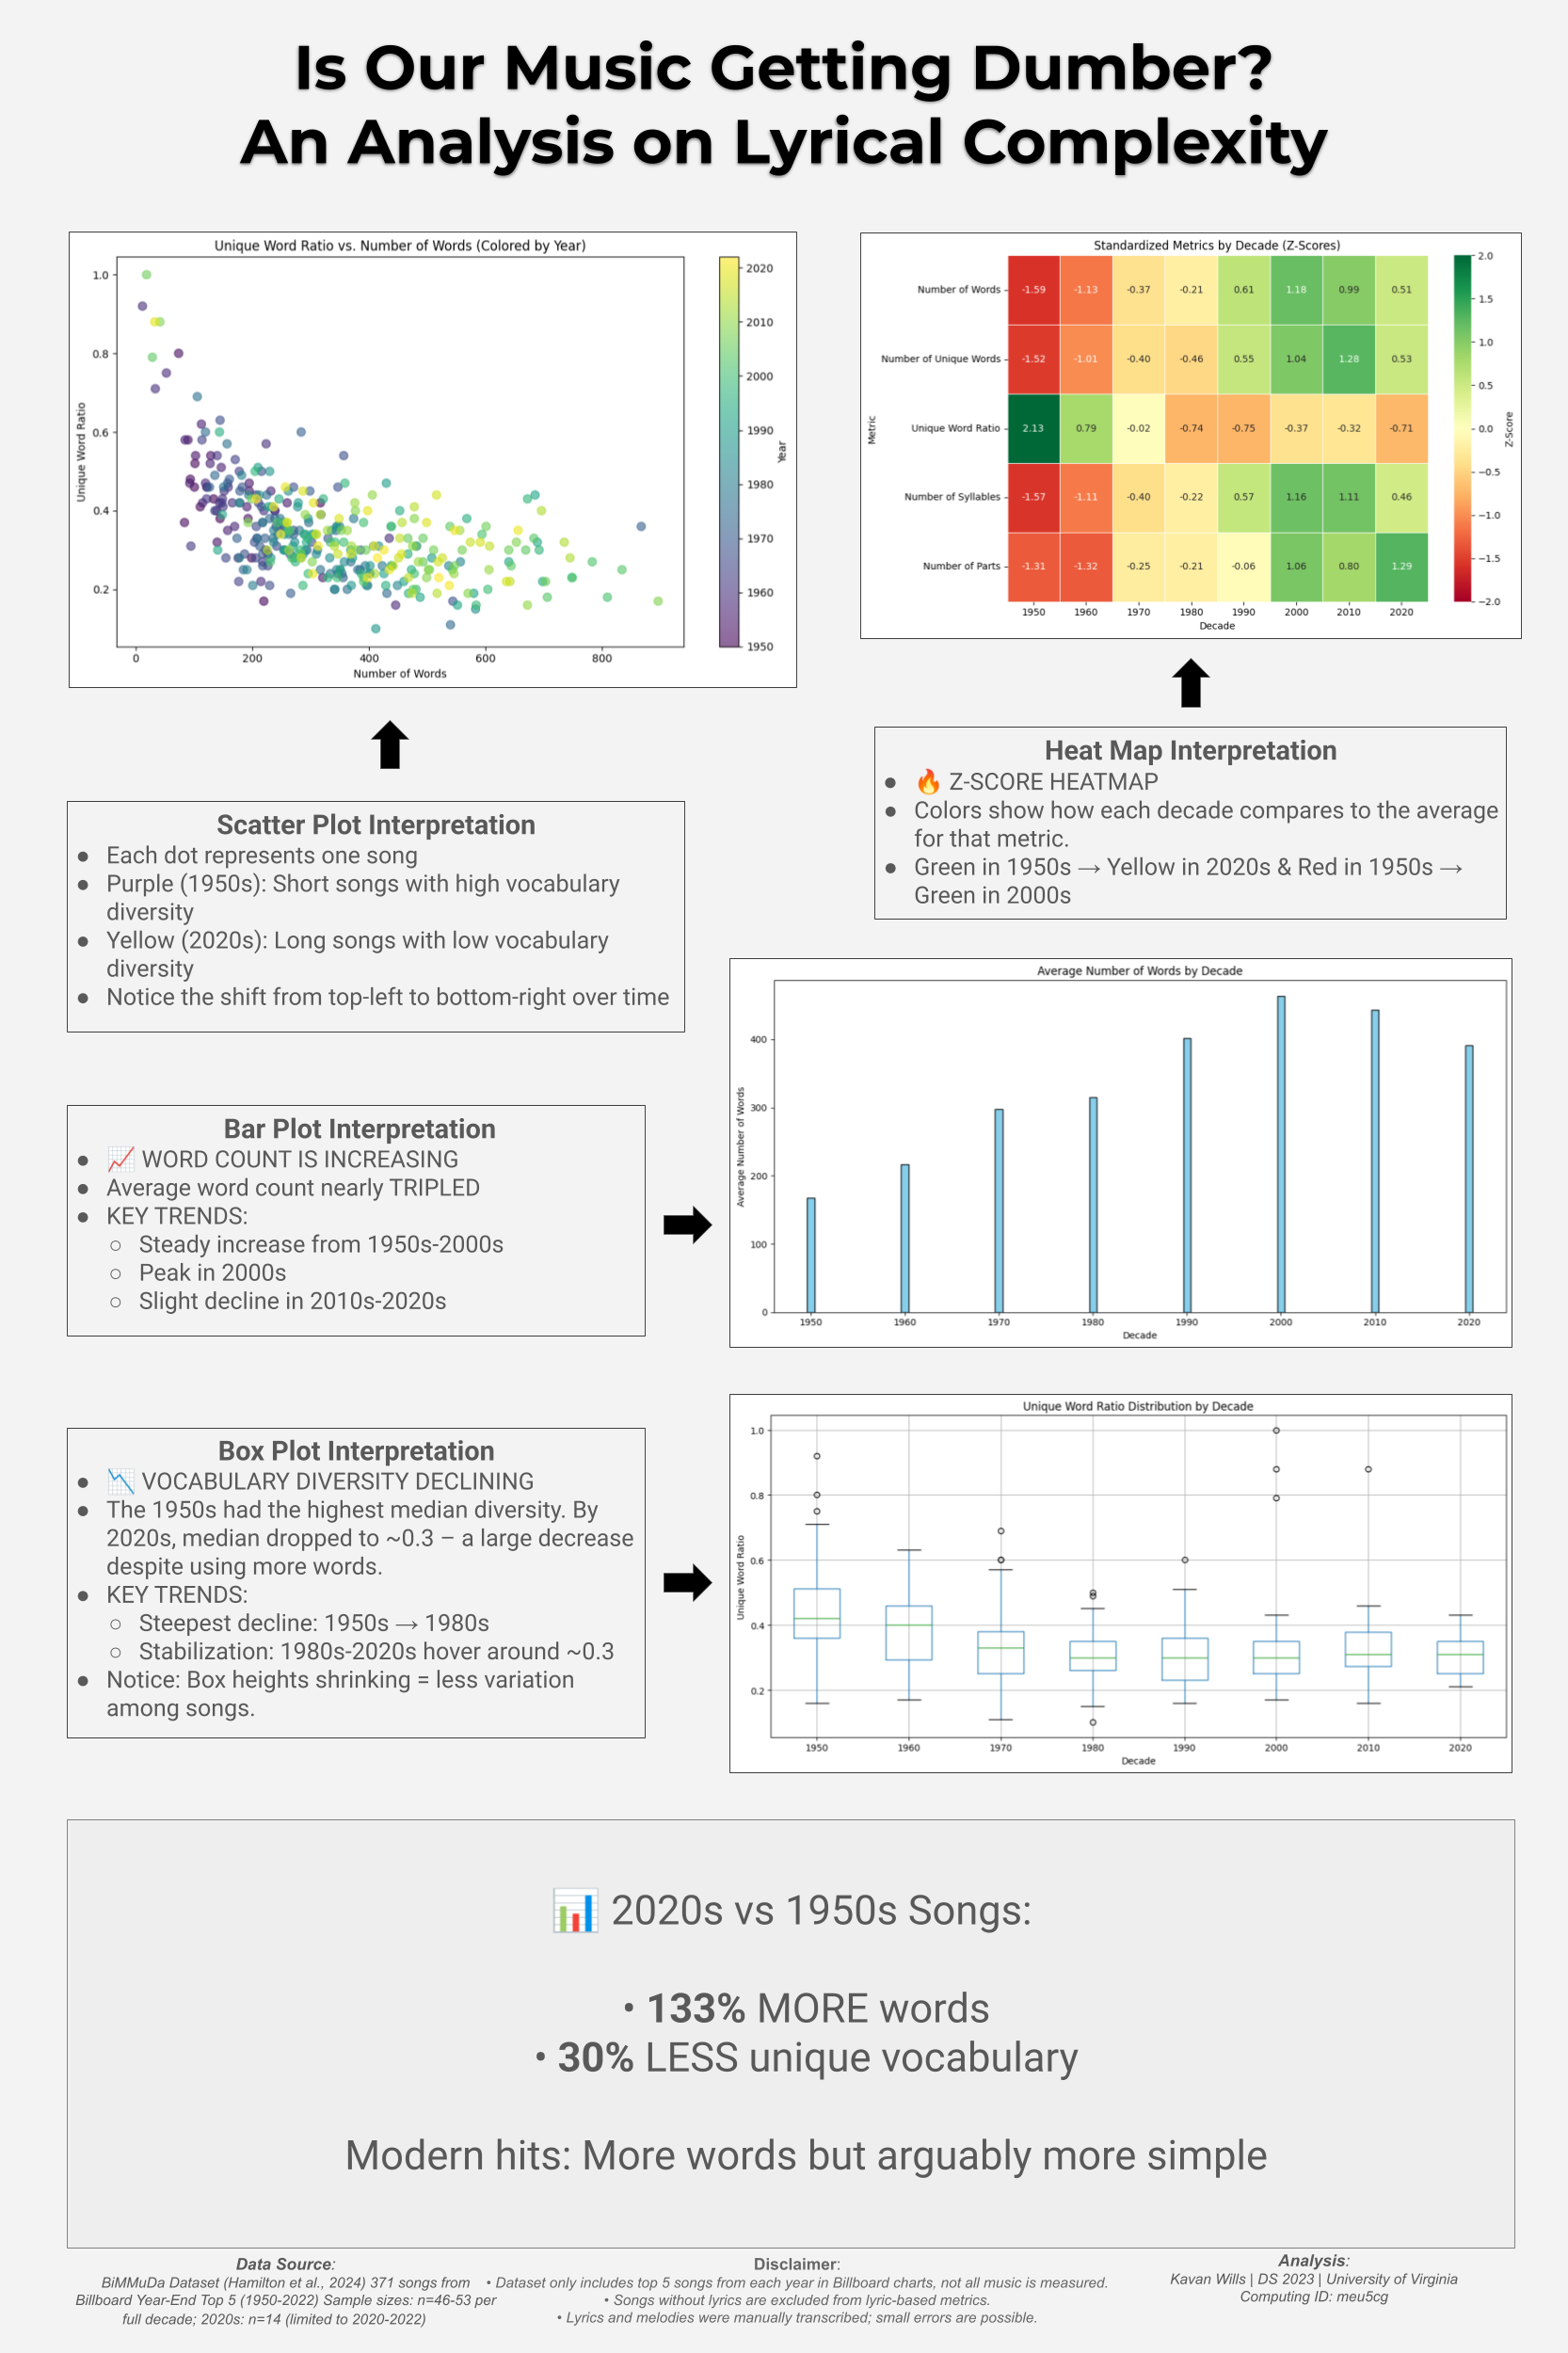

In [97]:
from IPython.display import Image, display
import pandas as pd

# Display the final infographic
display(Image(filename='DSF Infographic (13).png'))

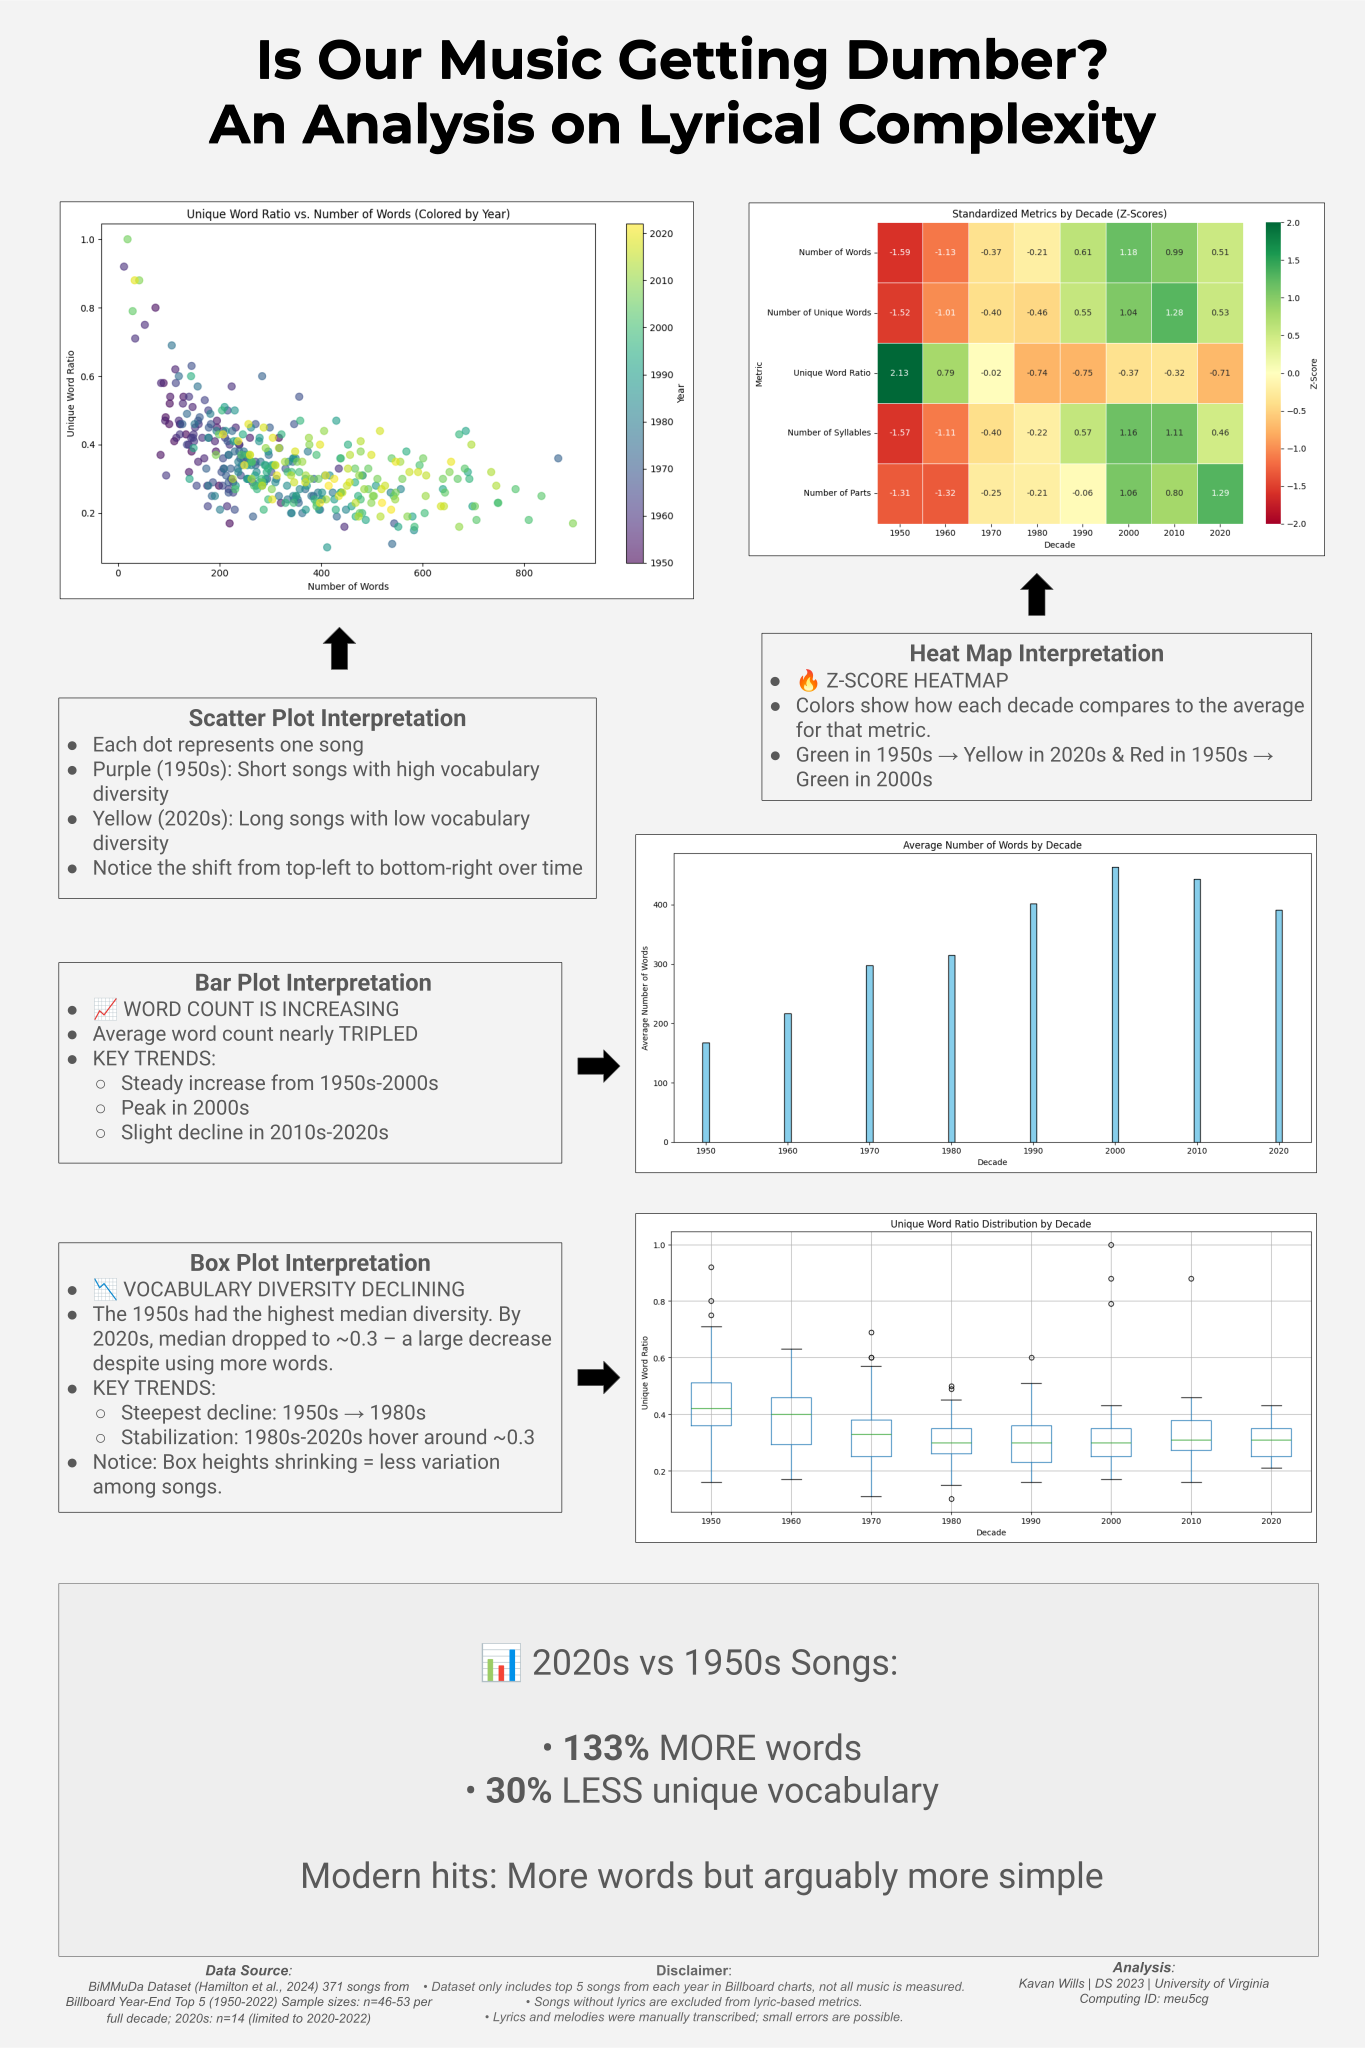

In [96]:
from IPython.display import SVG, display

display(SVG(filename="DSF Infographic (11).svg"))

---

## Title of Final Product

**"Is Our Music Getting Dumber? An Analysis on Lyrical Complexity"**  

---

## Description of Final Product

This infographic explores the paradox of modern popular music: while songs have gained more words (133% more words than songs from the 1950s), they have simultaneously become more simple, with a 30% decrease in vocabulary diversity. The 1950s averaged 168 words per song with a 0.44 unique word ratio, while the 2020s average 391 words with only a 0.31 ratio.

### Visual Story:
The infographic uses a 24" × 36" poster format to tell a data-driven story through:

1. **Scatter Plot (Top Left)**  
   Shows individual songs plotted by word count vs. unique word ratio  
   Color-coded by year (purple = 1950s, yellow = 2020s)  
   Reveals the clustering pattern: older songs (short & diverse) vs. modern songs (long & repetitive)

2. **Heatmap (Top Right)**  
   Shows all metrics across decades in a color-coded matrix  
   Colors show how each decade compares to the average for that metric.   
   Demonstrates the inverse relationship: word count rising while diversity declining

3. **Bar Chart (Middle Right)**  
   Average word count by decade showing steady increase from 1950s to 2000s  
   Peak at 2000s with slight decline in 2020s

4. **Box Plot (Bottom Right)**  
   Distribution of lyrical diversity across decades  
   Shows declining median from 1950s-1980s, then stabilization at lower levels

**Supporting Elements:**

- **Key Statistics Callout Box** (center): "2020s songs: 133% MORE words (168→391), 30% LOWER diversity (0.44→0.31)"
- **Annotations** by each plot explaining trends and key insights

### Design Approach:

**Color Scheme:**
- **Temporal gradient (Scatter plot):** Purple (1950s) to yellow (2020s) shows progression over time
- **Intensity heatmap:** Bright green (high values) to dark red (low values) shows metric magnitude
- **Consistent blue:** Bar and box plots use blue for clean, professional appearance
- **Neutral background:** White/light gray for maximum readability

**Layout:** 
- 2×2 grid arrangement with four equal-weight plots
- Key statistic callout centered for emphasis
- Annotations positioned directly below/beside each plot
- Hierarchical flow: title → visuals → interpretation → source

**Typography:** 
- Bold headers for section titles and key statistics
- 14-16pt body text in annotations for readability
- Clear axis labels with appropriate font sizing
- Sans-serif font (Arial/similar) for modern, clean look

**Annotations:** 
- Text boxes with borders for visual separation
- Bullet points for scannability
- Arrows connecting annotations to relevant plot features
- Emoji icons (📈📉🔥) to enhance visual interest and guide attention

### Target Audience:
Music enthusiasts, data visualization students, cultural historians.

### Main Message:
Modern music production prioritizes number of words over unique word ratio, which likely means more repetitive and simple music.

In [88]:
# Calculate exact statistics for infographic claims
import pandas as pd

df = pd.read_csv('bimmuda_per_song_full.csv')
df_clean = df[df['Number of Words'] > 0].copy()
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

# Get 1950s and 2020s averages
stats_1950s = df_clean[df_clean['Decade'] == 1950].agg({
    'Number of Words': 'mean',
    'Unique Word Ratio': 'mean'
})

stats_2020s = df_clean[df_clean['Decade'] == 2020].agg({
    'Number of Words': 'mean',
    'Unique Word Ratio': 'mean'
})

# Calculate percentage changes
word_increase = ((stats_2020s['Number of Words'] - stats_1950s['Number of Words']) 
                 / stats_1950s['Number of Words'] * 100)

ratio_decrease = ((stats_1950s['Unique Word Ratio'] - stats_2020s['Unique Word Ratio']) 
                  / stats_1950s['Unique Word Ratio'] * 100)

print(f"1950s: {stats_1950s['Number of Words']:.1f} words, {stats_1950s['Unique Word Ratio']:.2f} ratio")
print(f"2020s: {stats_2020s['Number of Words']:.1f} words, {stats_2020s['Unique Word Ratio']:.2f} ratio")
print(f"\nWord count increase: {word_increase:.1f}%")
print(f"Diversity decrease: {ratio_decrease:.1f}%")

1950s: 167.9 words, 0.44 ratio
2020s: 391.4 words, 0.31 ratio

Word count increase: 133.0%
Diversity decrease: 29.7%


In [89]:
df_clean = df[df["Number of Words"] > 0].copy()

df_clean["Decade"] = (df_clean["Year"] // 10) * 10

decade_summary = (
    df_clean
    .groupby("Decade")
    .agg(
        mean_words=("Number of Words", "mean"),
        mean_unique_words=("Number of Unique Words", "mean"),
        mean_unique_ratio=("Unique Word Ratio", "mean"),
        mean_syllables=("Number of Syllables", "mean"),
    )
)

decade_summary = decade_summary.round({
    "mean_words": 1,
    "mean_unique_words": 1,
    "mean_unique_ratio": 2,
    "mean_syllables": 1,
})

decade_summary.loc[[1950, 2020]]


mean_words  mean_unique_words  mean_unique_ratio  mean_syllables
Decade                                                                  
1950         167.9               65.7               0.44           213.1
2020         391.4              118.3               0.31           473.9

In [90]:
w_50 = decade_summary.loc[1950, "mean_words"]
w_20 = decade_summary.loc[2020, "mean_words"]
r_50 = decade_summary.loc[1950, "mean_unique_ratio"]
r_20 = decade_summary.loc[2020, "mean_unique_ratio"]

word_increase_pct = ((w_20 - w_50) / w_50) * 100
ratio_decrease_pct = ((r_50 - r_20) / r_50) * 100

print("Average words per song:")
print(f"  1950s: {w_50:.1f}")
print(f"  2020s: {w_20:.1f}")
print(f"  Percent increase: {word_increase_pct:.1f}%")

print("\nAverage unique-word ratio:")
print(f"  1950s: {r_50:.2f}")
print(f"  2020s: {r_20:.2f}")
print(f"  Percent decrease: {ratio_decrease_pct:.1f}%")

Average words per song:
  1950s: 167.9
  2020s: 391.4
  Percent increase: 133.1%

Average unique-word ratio:
  1950s: 0.44
  2020s: 0.31
  Percent decrease: 29.5%


---

## Design Process Documentation

### Paper Storyboard

Before creating the infographic digitally, I sketched the layout on paper to plan composition, plot arrangement, and visual hierarchy.

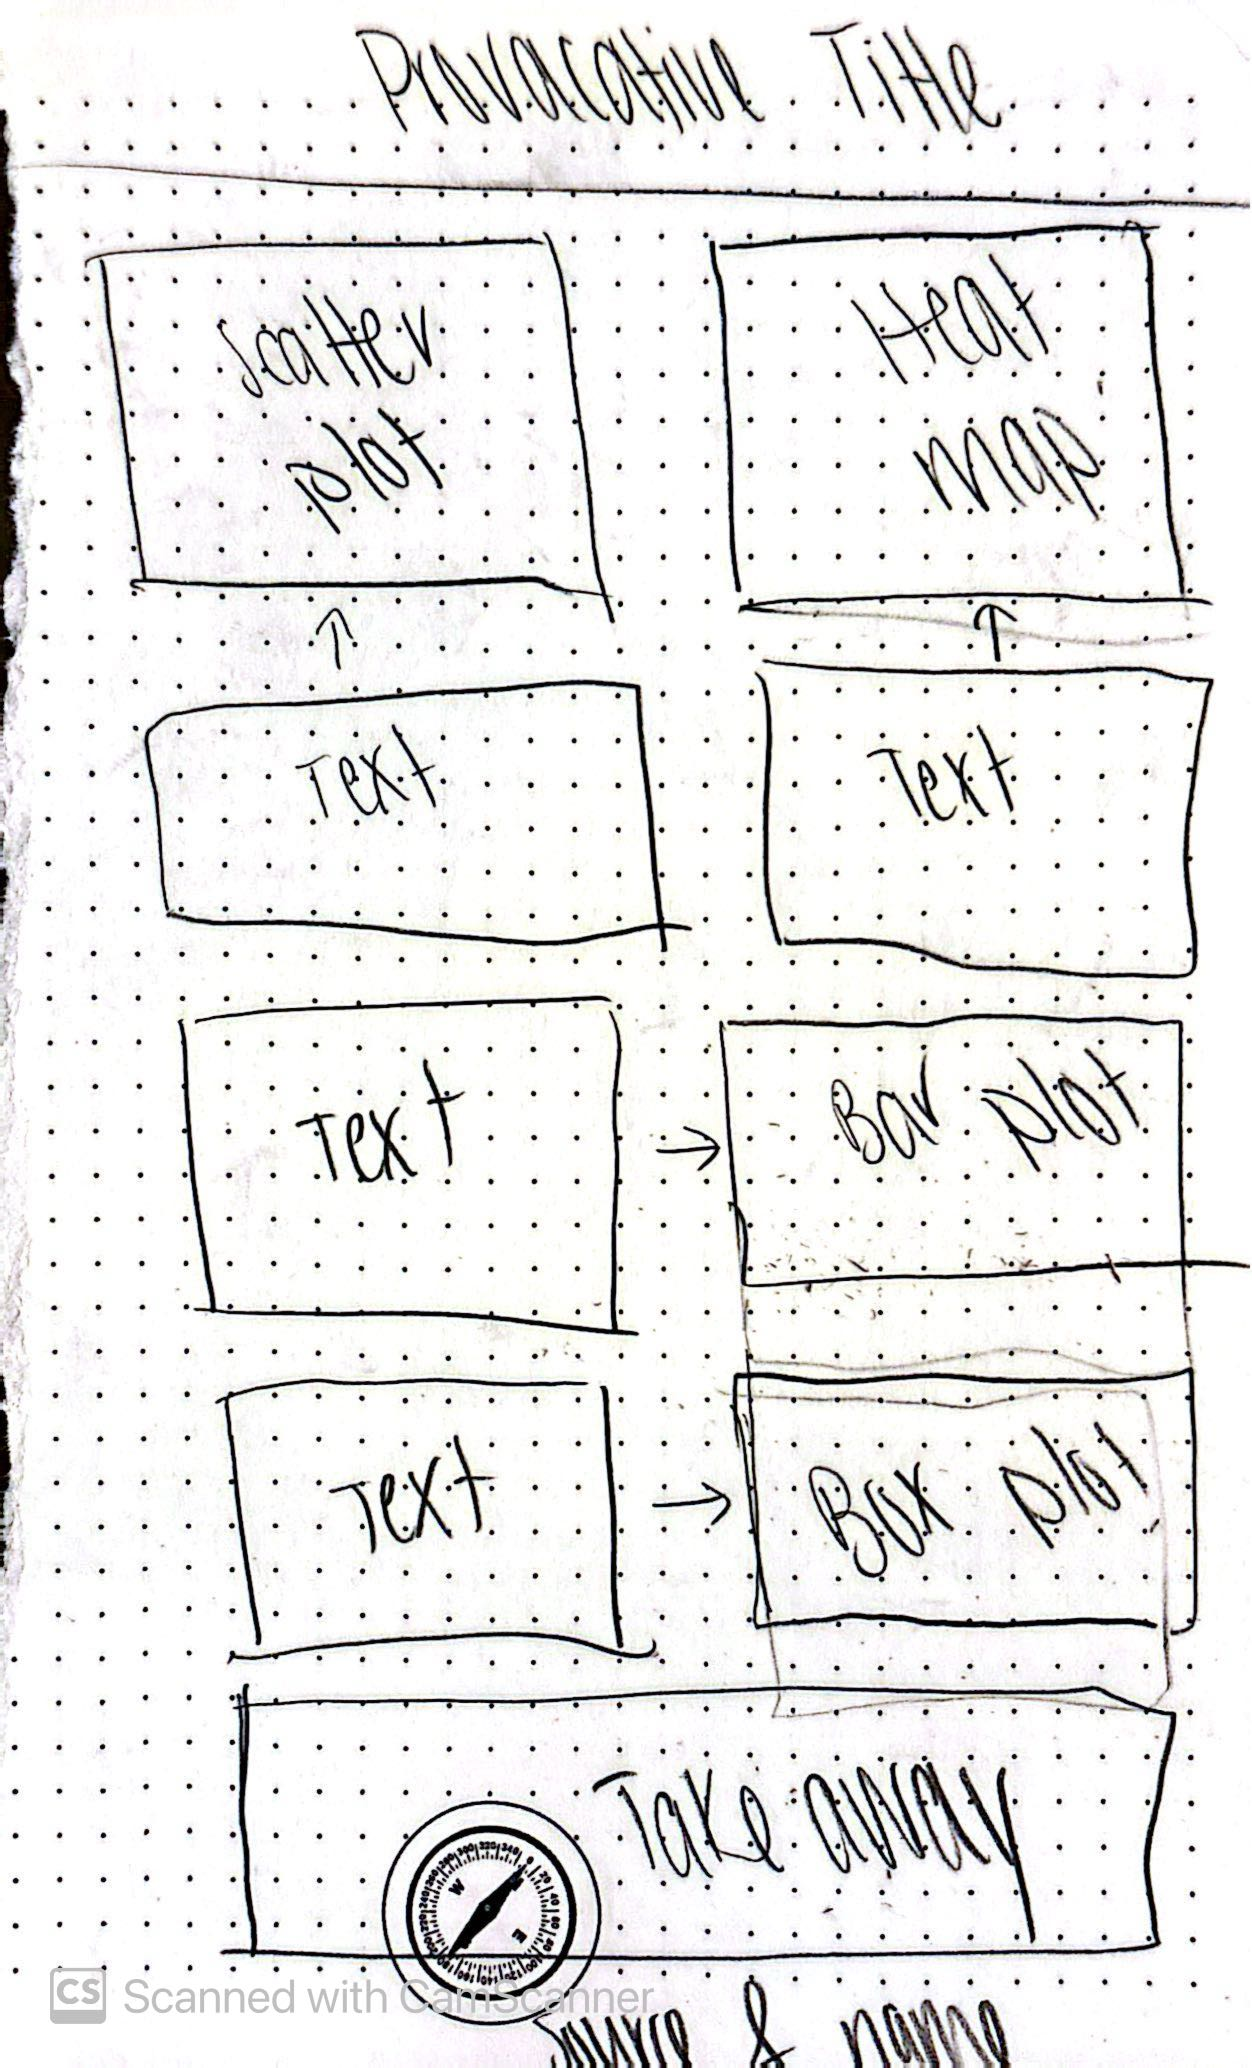

In [99]:
from IPython.display import Image, display

# Display storyboard sketch
display(Image(filename='Infographic_rough_sketch.JPG'))

**Storyboard decisions:**
- Positioned scatter plot top-left as primary focal point
- Placed heatmap top-right to show comprehensive metrics
- Bar and box plots middle-right and bottom-right to support main narrative
- Central key statistic box for immediate impact

### Design Tool: Google Slides

The infographic was created in Google Slides with custom dimensions (24" × 36").

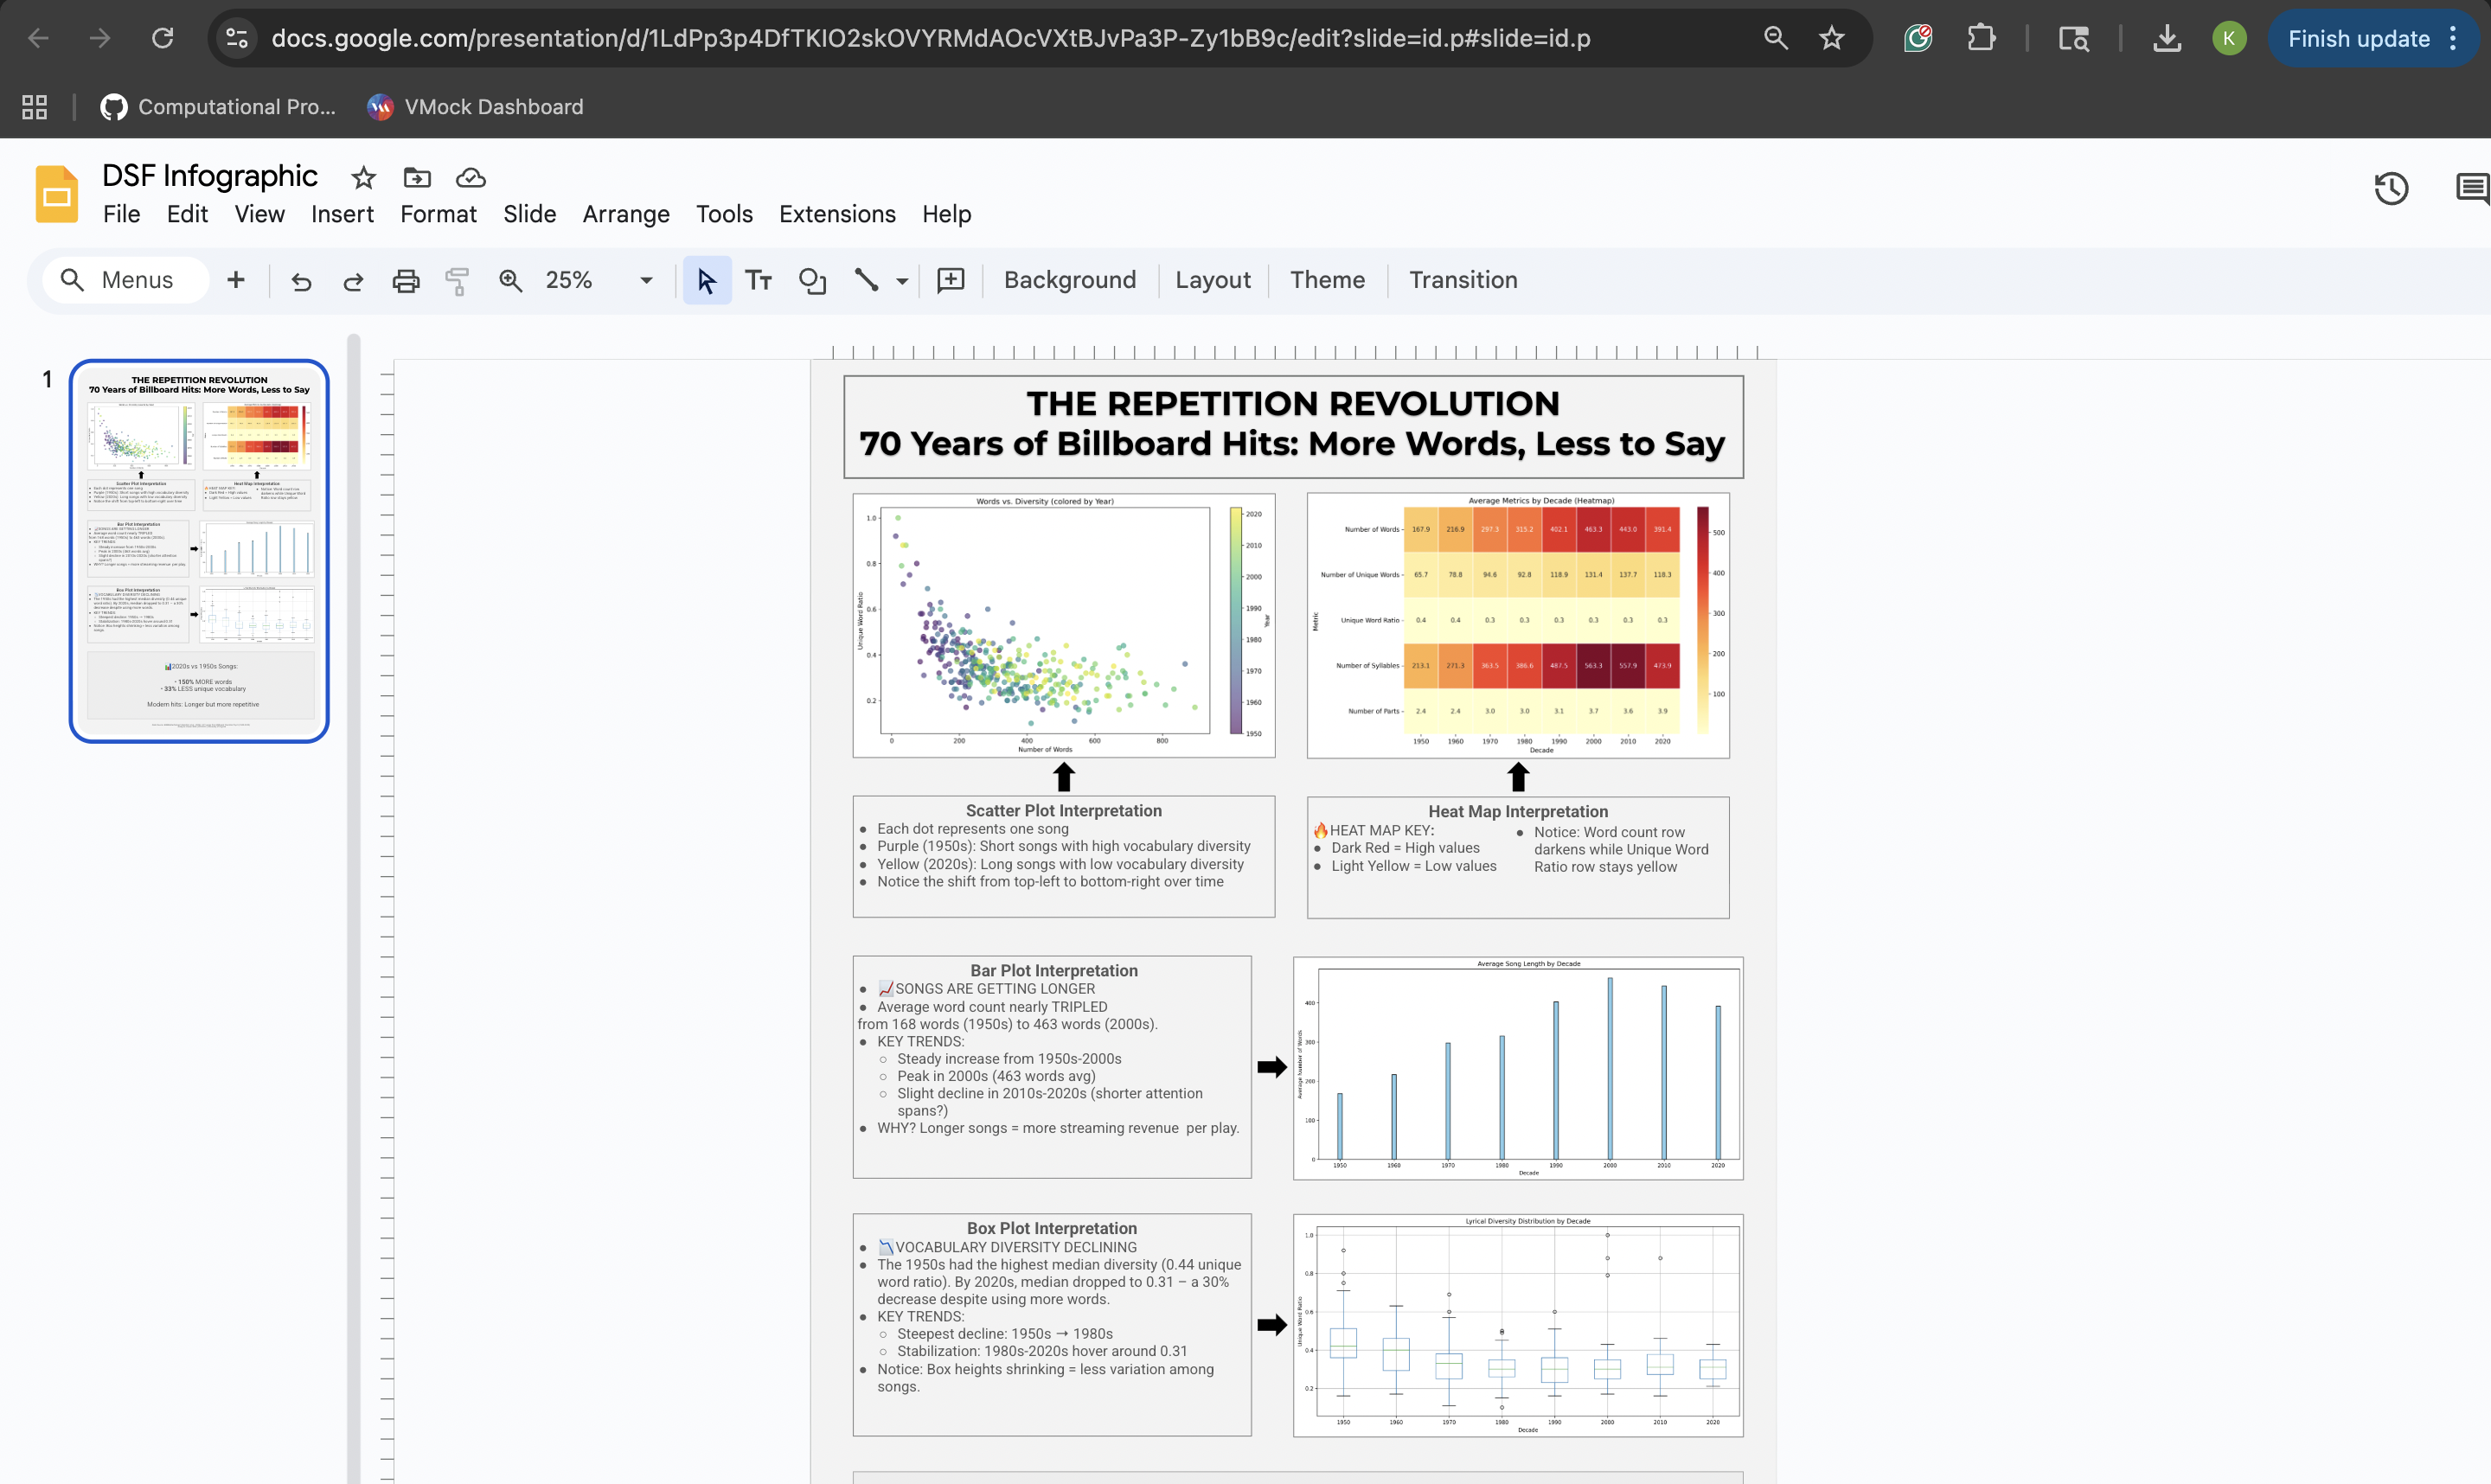

In [92]:
display(Image(filename='DSF_googledriveediting.png'))

---
## Project Manifest

In [100]:
import pandas as pd

manifest_data = [
    # --- Core notebooks (source of analysis) ---
    {
        "Resource Name": "DFP_Notebook1.ipynb",
        "Type": "Jupyter Notebook",
        "Description": "Notebook 1 – project framing, BiMMuDa data description, and COLS table.",
        "Link": "./DFP_Notebook1.ipynb"
    },
    {
        "Resource Name": "DFP_Notebook2.ipynb",
        "Type": "Jupyter Notebook",
        "Description": "Notebook 2 – exploratory data analysis and visualizations for lyric-complexity features.",
        "Link": "./DFP_Notebook2.ipynb"
    },
    {
        "Resource Name": "DFP_Notebook3.ipynb",
        "Type": "Jupyter Notebook",
        "Description": "Notebook 3 – final infographic, supporting statistics, and project manifest.",
        "Link": "./DFP_Notebook3.ipynb"
    },

    # --- PDF exports (for easy viewing) ---
    {
        "Resource Name": "DFP_Notebook1.pdf",
        "Type": "PDF Export",
        "Description": "PDF export of Notebook 1 for easier viewing/printing.",
        "Link": "./DFP_Notebook1.pdf"
    },
    {
        "Resource Name": "DFP_Notebook2.pdf",
        "Type": "PDF Export",
        "Description": "PDF export of Notebook 2 for easier viewing/printing.",
        "Link": "./DFP_Notebook2.pdf"
    },
    {
        "Resource Name": "DFP_Notebook3.pdf",
        "Type": "PDF Export",
        "Description": "PDF export of Notebook 3 for easier viewing/printing.",
        "Link": "./DFP_Notebook3.pdf"
    },

    # --- Data file ---
    {
        "Resource Name": "bimmuda_per_song_full.csv",
        "Type": "CSV Data File",
        "Description": "Per-song BiMMuDa dataset used in the project (379 rows representing 371 unique songs).",
        "Link": "./bimmuda_per_song_full.csv"
    },

    # --- Final infographic & design artifacts ---
    {
        "Resource Name": "DSF Infographic (12).png",
        "Type": "Image (PNG)",
        "Description": "Final infographic poster (PNG, 24\"×36\" canvas) for on-screen viewing.",
        "Link": "./DSF Infographic (12).png"
    },
    {
        "Resource Name": "DSF Infographic (10).svg",
        "Type": "Image (SVG)",
        "Description": "Final infographic poster (SVG, vector format) suitable for high-resolution printing.",
        "Link": "./DSF Infographic (10).svg"
    },
    {
        "Resource Name": "Infographic_rough_sketch.JPG",
        "Type": "Image (JPG)",
        "Description": "Hand-drawn rough sketch of the infographic layout created during planning.",
        "Link": "./Infographic_rough_sketch.JPG"
    },
    {
        "Resource Name": "DSF_googledriveediting.png",
        "Type": "Image (PNG)",
        "Description": "Screenshot of editing the infographic in Google Slides.",
        "Link": "./DSF_googledriveediting.png"
    },

    # --- External resources ---
    {
        "Resource Name": "Project GitHub Repository",
        "Type": "External Resource",
        "Description": "Public GitHub repository containing all project files.",
        "Link": "https://github.com/kavanwills/ds2023-final-bimmuda"
    },
    {
        "Resource Name": "Infographic Google Slides",
        "Type": "External Resource",
        "Description": "Google Slides file used to design and export the final infographic.",
        "Link": "https://docs.google.com/presentation/d/1LdPp3p4DfTKIO2skOVYRMdAOcVXtBJvPa3P-Zy1bB9c/edit"
    },
    {
        "Resource Name": "BiMMuDa Paper (Hamilton et al., 2024)",
        "Type": "External Resource",
        "Description": "Research paper describing the construction of the Billboard Melodic Music Dataset (BiMMuDa).",
        "Link": "https://transactions.ismir.net/articles/10.5334/tismir.168"
    },
    {
        "Resource Name": "BiMMuDa GitHub Repository",
        "Type": "External Resource",
        "Description": "GitHub repository containing BiMMuDa data and code released by the authors.",
        "Link": "https://github.com/madelinehamilton/BiMMuDa"
    },
    {
        "Resource Name": "BiMMuDa Documentation",
        "Type": "External Resource",
        "Description": "Online documentation / Google Doc describing the per-song CSV and variable definitions.",
        "Link": "https://docs.google.com/document/d/17EyW-bA8oppRZ_3KloYB5Z-hJ-1L7ASldz6GH_BUd_g/edit"
    }
]

manifest_df = pd.DataFrame(manifest_data)
manifest_df


Resource Name               Type  \
0                     DFP_Notebook1.ipynb   Jupyter Notebook   
1                     DFP_Notebook2.ipynb   Jupyter Notebook   
2                     DFP_Notebook3.ipynb   Jupyter Notebook   
3                       DFP_Notebook1.pdf         PDF Export   
4                       DFP_Notebook2.pdf         PDF Export   
5                       DFP_Notebook3.pdf         PDF Export   
6               bimmuda_per_song_full.csv      CSV Data File   
7                DSF Infographic (12).png        Image (PNG)   
8                DSF Infographic (10).svg        Image (SVG)   
9            Infographic_rough_sketch.JPG        Image (JPG)   
10             DSF_googledriveediting.png        Image (PNG)   
11              Project GitHub Repository  External Resource   
12              Infographic Google Slides  External Resource   
13  BiMMuDa Paper (Hamilton et al., 2024)  External Resource   
14              BiMMuDa GitHub Repository  External Resource   
15                  BiMMuDa Documentation  External Resource   

                                          Description  \
0   Notebook 1 – project framing, BiMMuDa data des...   
1   Notebook 2 – exploratory data analysis and vis...   
2   Notebook 3 – final infographic, supporting sta...   
3   PDF export of Notebook 1 for easier viewing/pr...   
4   PDF export of Notebook 2 for easier viewing/pr...   
5   PDF export of Notebook 3 for easier viewing/pr...   
6   Per-song BiMMuDa dataset used in the project (...   
7   Final infographic poster (PNG, 24"×36" canvas)...   
8   Final infographic poster (SVG, vector format) ...   
9   Hand-drawn rough sketch of the infographic lay...   
10  Screenshot of editing the infographic in Googl...   
11  Public GitHub repository containing all projec...   
12  Google Slides file used to design and export t...   
13  Research paper describing the construction of ...   
14  GitHub repository containing BiMMuDa data and ...   
15  Online documentation / Google Doc describing t...   

                                                 Link  
0                               ./DFP_Notebook1.ipynb  
1                               ./DFP_Notebook2.ipynb  
2                               ./DFP_Notebook3.ipynb  
3                                 ./DFP_Notebook1.pdf  
4                                 ./DFP_Notebook2.pdf  
5                                 ./DFP_Notebook3.pdf  
6                         ./bimmuda_per_song_full.csv  
7                          ./DSF Infographic (12).png  
8                          ./DSF Infographic (10).svg  
9                      ./Infographic_rough_sketch.JPG  
10                       ./DSF_googledriveediting.png  
11  https://github.com/kavanwills/ds2023-final-bim...  
12  https://docs.google.com/presentation/d/1LdPp3p...  
13  https://transactions.ismir.net/articles/10.533...  
14        https://github.com/madelinehamilton/BiMMuDa  
15  https://docs.google.com/document/d/17EyW-bA8op...

---

## Project Summary

### Dataset
- **Name:** BiMMuDa (Billboard Melodic Music Dataset)
- **Songs:** 371 from Billboard year-end top 5 (1950-2022)
- **Focus:** Lyrical complexity trends

### Key Finding
**Modern Billboard hits use 133% more words than 1950s songs but have 30% less vocabulary diversity.**

### Methodology
1. Data establishment (Notebook 1)
2. Exploratory analysis with 17+ visualizations (Notebook 2)
3. Selection of best plots for infographic
4. Storyboard design on paper
5. Infographic in Google Slides (24×36 format)
6. Final export as PNG and PDF

### Tools Used
- **Analysis:** Python (pandas, matplotlib, seaborn)
- **Design:** Google Slides
- **Documentation:** Jupyter Notebooks

---

## AI Usage Acknowledgement

Per course policy, I used **Claude (Anthropic)** and **ChatGPT (OpenAI)** as a learning aid for code examples, debugging, and conceptual clarification. All submitted work reflects my own understanding and reasoning. I can explain all aspects of this work without external assistance.

**Kavan Wills (meu5cg)** 